In [50]:
import sys
sys.path.append('../source/')
import numpy as np
from Users import Users
from Producers import *
from sklearn.preprocessing import normalize
from plotting import *
from tqdm import tqdm
import pandas as pd

In [75]:
df_uf_temp10 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_10.0_common_config.pkl")
df_wei_temp10 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_10.0_common_config.pkl")
df_ml_temp10 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_10.0_common_config3.pkl")

In [77]:
df_ml_temp10_old = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_10.0.pkl")

In [68]:
df_uf_temp10_s = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_10.0.pkl")
df_wei_temp10_s = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_10.0.pkl")
df_ml_temp10_s = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_10.0_common_config2.pkl")

In [69]:
df_uf_temp10_s.equals(df_uf_temp10)

True

In [70]:
df_wei_temp10_s.equals(df_wei_temp10)

True

In [71]:
df_ml_temp10_s.equals(df_ml_temp10)

True

In [9]:
df_ml_temp10_slold = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_10.0_common_config.pkl")

In [7]:
df_ml_temp10 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_10.0_common_config2.pkl")

In [10]:
df_ml_temp10.equals(df_ml_temp10_slold)

False

In [13]:
df_ml_temp10

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
0,5,2,10,True,7,"[0.0, 0.0, 0.0, 10.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,19.400578,19.400578,19.400578,194.005785,0.205733,0.615063,0.004418
1,5,2,20,True,12,"[0.0, 0.0, 0.0, 20.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,9.700289,9.700289,9.700289,194.005785,0.205733,0.615063,0.004418
2,5,2,30,True,25,"[0.0, 0.0, 0.0, 30.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,6.466859,6.466859,6.466859,194.005785,0.205733,0.615063,0.004418
3,5,2,40,True,31,"[0.0, 0.0, 0.0, 40.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,4.850145,4.850145,4.850145,194.005785,0.205733,0.615063,0.004418
4,5,2,50,True,36,"[0.0, 0.0, 0.0, 50.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,3.880116,3.880116,3.880116,194.005785,0.205733,0.615063,0.004418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,20,29,60,True,56,"[0.0, 0.0, 0.0, 0.0, 0.0, 60.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.051694889981336097, 0.04983736989270799, 0....",49.371305,0.822855,0.822855,0.822855,49.371305,0.052356,0.246935,0.000093
396,20,29,70,True,69,"[0.0, 0.0, 0.0, 0.0, 0.0, 70.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.051694889981336097, 0.04983736989270799, 0....",49.371305,0.705304,0.705304,0.705304,49.371305,0.052356,0.246935,0.000093
397,20,29,80,True,76,"[0.0, 0.0, 0.0, 0.0, 0.0, 80.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.051694889981336097, 0.04983736989270799, 0....",49.371305,0.617141,0.617141,0.617141,49.371305,0.052356,0.246935,0.000093
398,20,29,90,True,83,"[0.0, 0.0, 0.0, 0.0, 0.0, 90.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.051694889981336097, 0.04983736989270799, 0....",49.371305,0.548570,0.548570,0.548570,49.371305,0.052356,0.246935,0.000093


In [12]:
df_ml_temp10_slold

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
0,5,2,10,True,7,"[0.0, 0.0, 0.0, 10.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,19.400578,19.400578,19.400578,194.005785,0.205733,0.615063,0.004418
1,5,2,20,True,15,"[0.0, 0.0, 0.0, 20.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,9.700289,9.700289,9.700289,194.005785,0.205733,0.615063,0.004418
2,5,2,30,True,24,"[0.0, 0.0, 0.0, 30.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,6.466859,6.466859,6.466859,194.005785,0.205733,0.615063,0.004418
3,5,2,40,True,34,"[0.0, 0.0, 0.0, 40.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,4.850145,4.850145,4.850145,194.005785,0.205733,0.615063,0.004418
4,5,2,50,True,43,"[0.0, 0.0, 0.0, 50.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.19337245991569033, 0.19468834366168863, 0.2...",194.005785,3.880116,3.880116,3.880116,194.005785,0.205733,0.615063,0.004418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,20,29,60,True,58,"[0.0, 0.0, 0.0, 0.0, 0.0, 60.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.051694889981336097, 0.04983736989270799, 0....",49.371305,0.822855,0.822855,0.822855,49.371305,0.052356,0.246935,0.000093
396,20,29,70,True,67,"[0.0, 0.0, 0.0, 0.0, 0.0, 70.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.051694889981336097, 0.04983736989270799, 0....",49.371305,0.705304,0.705304,0.705304,49.371305,0.052356,0.246935,0.000093
397,20,29,80,True,76,"[0.0, 0.0, 0.0, 0.0, 0.0, 80.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.051694889981336097, 0.04983736989270799, 0....",49.371305,0.617141,0.617141,0.617141,49.371305,0.052356,0.246935,0.000093
398,20,29,90,True,86,"[0.0, 0.0, 0.0, 0.0, 0.0, 90.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.051694889981336097, 0.04983736989270799, 0....",49.371305,0.548570,0.548570,0.548570,49.371305,0.052356,0.246935,0.000093


In [41]:
np_cols = ['producer_dist', 'user_dist', 'last_profile_compact', 'iters']

In [42]:
df_ml_temp10.drop(columns = np_cols)

,dimension,seed,nprod,NE_exists,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
0,5,2,10,True,194.005785,19.400578,19.400578,19.400578,194.005785,0.205733,0.615063,0.004418
1,5,2,20,True,194.005785,9.700289,9.700289,9.700289,194.005785,0.205733,0.615063,0.004418
2,5,2,30,True,194.005785,6.466859,6.466859,6.466859,194.005785,0.205733,0.615063,0.004418
3,5,2,40,True,194.005785,4.850145,4.850145,4.850145,194.005785,0.205733,0.615063,0.004418
4,5,2,50,True,194.005785,3.880116,3.880116,3.880116,194.005785,0.205733,0.615063,0.004418
...,...,...,...,...,...,...,...,...,...,...,...,...
395,20,29,60,True,49.371305,0.822855,0.822855,0.822855,49.371305,0.052356,0.246935,0.000093
396,20,29,70,True,49.371305,0.705304,0.705304,0.705304,49.371305,0.052356,0.246935,0.000093
397,20,29,80,True,49.371305,0.617141,0.617141,0.617141,49.371305,0.052356,0.246935,0.000093
398,20,29,90,True,49.371305,0.548570,0.548570,0.548570,49.371305,0.052356,0.246935,0.000093


In [43]:
df_ml_temp10_drop = df_ml_temp10.drop(columns = np_cols)

In [44]:
df_ml_temp10_sldrop = df_ml_temp10_slold.drop(columns = np_cols)

In [45]:
df_ml_temp10_sldrop.columns

Index(['dimension', 'seed', 'nprod', 'NE_exists', 'total_prod_util',
       'avg_prod_util', 'max_prod_util', 'min_prod_util', 'total_user_util',
       'avg_user_util', 'max_user_util', 'min_user_util'],
      dtype='object')

In [46]:
df_ml_temp10_drop.columns

Index(['dimension', 'seed', 'nprod', 'NE_exists', 'total_prod_util',
       'avg_prod_util', 'max_prod_util', 'min_prod_util', 'total_user_util',
       'avg_user_util', 'max_user_util', 'min_user_util'],
      dtype='object')

In [47]:
df_ml_temp10_sldrop.equals(df_ml_temp10_drop)

False

In [32]:
df_ml_temp10_drop[['dimension','seed', 'nprod']].equals(df_ml_temp10_sldrop[['dimension','seed', 'nprod']])

True

In [36]:
(df_ml_temp10_drop['avg_prod_util'] - df_ml_temp10_sldrop['avg_prod_util']).sum()

3.885780586188048e-15

In [37]:
(df_ml_temp10_drop['min_prod_util'] - df_ml_temp10_sldrop['min_prod_util']).sum()

-6.661338147750939e-16

In [48]:
(df_ml_temp10_drop['iters'] - df_ml_temp10_sldrop['iters']).sum() #iterations are different?

KeyError: 'iters'

In [40]:
(df_ml_temp10_drop['NE_exists'] == df_ml_temp10_sldrop['NE_exists']).sum()

400

In [74]:
# checking ud, pd for 
(df_ml_temp10['NE_exists'] == False).sum()

0

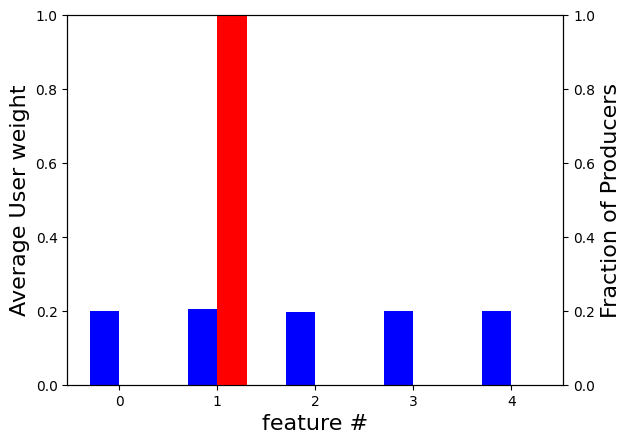

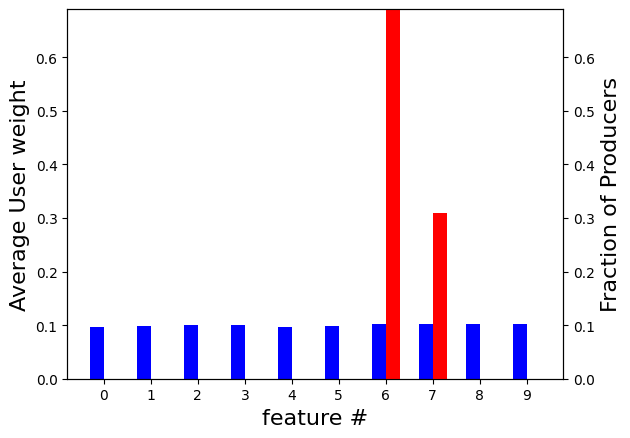

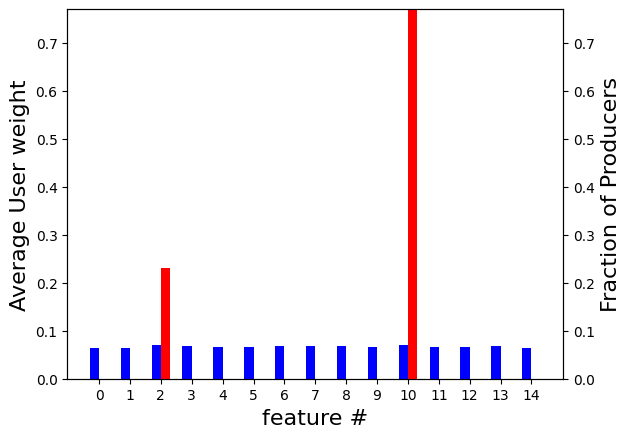

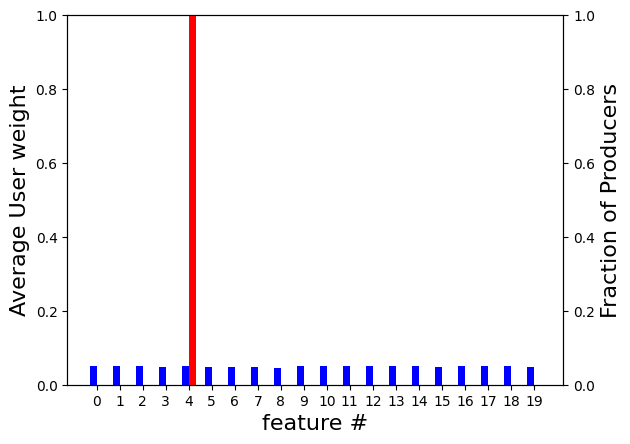

In [76]:
dims = [5, 10, 15, 20]
plot_and_save_singledf(dims = dims, df = df_ml_temp10, name = 'movielens/movielens100k_ccnew_temp10')

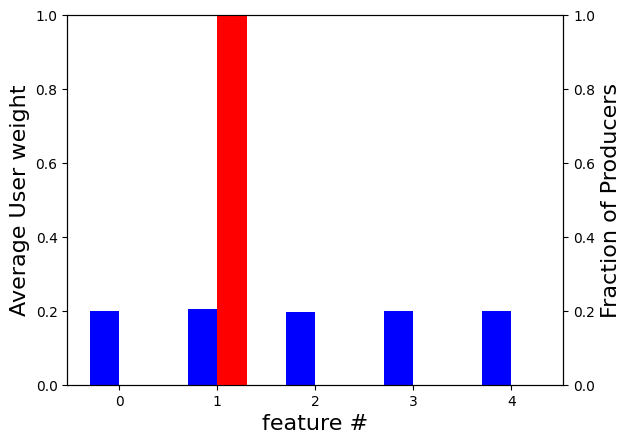

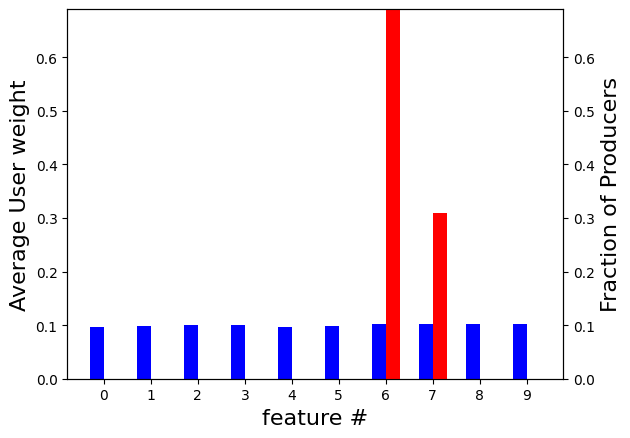

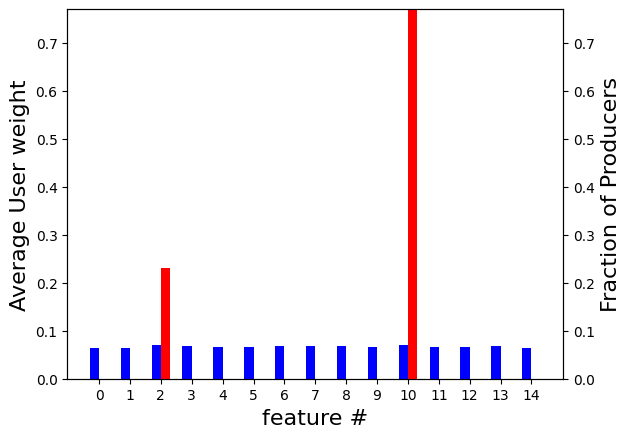

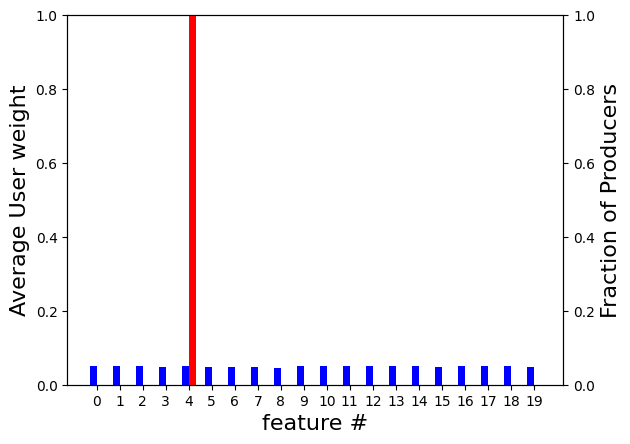

In [78]:
plot_and_save_singledf(dims = dims, df = df_ml_temp10_old, name = 'movielens/movielens100k_ccold_temp10')